/Users/atularavinddas/Documents/GitHub/US_Income_Maps/US_Income_Maps/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      50      017  01461765  0500000US50017  50017   Orange   06  1779395261   
1      50      027  01461770  0500000US50027  50027  Windsor   06  2511194819   
2      50      025  01461769  0500000US50025  50025  Windham   06  2034453051   
3      50      009  01461761  0500000US50009  50009    Essex   06  1718717372   
4      50      019  01461766  0500000US50019  50019  Orleans   06  1796346996   

     AWATER                                           geometry  
0  12010626  POLYGON ((-72.78728 43.96048, -72.79134 43.961...  
1  19362098  POLYGON ((-72.98016 43.88259, -72.95308 43.874...  
2  32925199  POLYGON ((-73.00637 42.96062, -73.00563 42.970...  
3  28683563  POLYGON ((-71.95941 44.80014, -71.9578 44.8020...  
4  71471486  POLYGON ((-72.53265 44.83351, -72.5373 44.8744...  


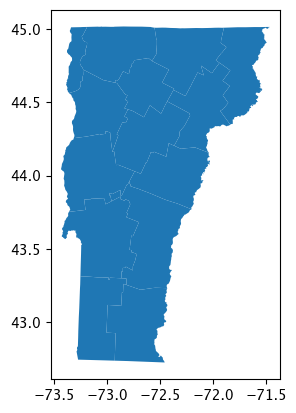

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import warnings
import pandas as pd
import os

counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip')

vt_counties = counties[counties['STATEFP'] == '50']

os.makedirs('.../vt_county_shapefiles', exist_ok=False)


vt_counties.to_file('../vt_county_shapefiles/vt_counties.shp')

vt_counties = gpd.read_file('../vt_county_shapefiles/vt_counties.shp')


print(vt_counties.head())

vt_counties.plot()
plt.show()

# Generate Maps of Vermont Counties

In [2]:
vt_parameters=pd.read_csv("../New_England_Datasets/NEW ENGLAND's data (states) - VT.csv")
vt_parameters

,COUNTY,Population,Income (per capita),Education \n(high school or higher attendance rate),Health (life expectancy),Crime rate (per population)
0,ADDISON,"36,821","$43,524",95.10%,81.3,0.0490
1,BENNINGTON,"37,125","$43,214",94.20%,77.7,0.0730
2,CALEDONIA,"31,227","$38,153",93.70%,78.4,0.0000
3,CHITTENDEN,"156,545","$52,802",97.20%,81.7,0.4880
4,ESSEX,"6,306","$34,221",88.50%,79.8,0.0000
5,FRANKLIN,"47,746","$38,447",93.00%,78.8,0.0730
6,GRAND ISLE,"6,970","$53,254",96.70%,80.5,0.0000
7,LAMOILLE,"24,475","$45,885",93.50%,80.4,0.0000
8,ORANGE,"28,936","$41,343",94.70%,79.8,0.0000
9,ORLEANS,"27,231","$36,459",91.90%,77.9,0.0000


In [3]:
vt_counties['NAME']=vt_counties['NAME'].str.upper()


In [4]:
vt_counties['Population'] = vt_parameters['Population'].str.replace(',', '').astype(float)
vt_counties['Income'] = vt_parameters['Income (per capita)'].str.replace('$', '').str.replace(',', '').astype(float)
vt_counties['Education']=vt_parameters['Education \n(high school or higher attendance rate)'].str.replace('%', '').astype(float)
vt_counties['Health']=vt_parameters['Health (life expectancy)']
vt_counties['Crime Rate']=vt_parameters['Crime rate (per population)']

vt_counties['Income'] = pd.to_numeric(vt_counties['Income'], errors='coerce')
vt_counties['Education'] = pd.to_numeric(vt_counties['Education'], errors='coerce')
vt_counties['Health'] = pd.to_numeric(vt_counties['Health'], errors='coerce')
vt_counties['Crime Rate'] = pd.to_numeric(vt_counties['Crime Rate'], errors='coerce')
vt_counties['Population'] = pd.to_numeric(vt_counties['Population'], errors='coerce')



In [5]:
vt_counties = vt_counties.dissolve(by='NAME', aggfunc='first').reset_index()




vt_counties = vt_counties.to_crs(epsg=4326)

m = folium.Map(location=[44, -71], zoom_start=6)


# All your choropleth layers
folium.Choropleth(
    geo_data=vt_counties,
    name='Income',
    data=vt_counties,
    columns=['NAME', 'Income'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Income per Capita ($)',
    overlay=True,
    show=True
).add_to(m)

folium.Choropleth(
    geo_data=vt_counties,
    name='Education',
    data=vt_counties,
    columns=['NAME', 'Education'],
    key_on='feature.properties.NAME',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Education (%)',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=vt_counties,
    name='Healthcare',
    data=vt_counties,
    columns=['NAME', 'Health'],
    key_on='feature.properties.NAME',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Life Expectancy',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=vt_counties,
    name='Crime Rate',
    data=vt_counties,
    columns=['NAME', 'Crime Rate'],
    key_on='feature.properties.NAME',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=vt_counties,
    name='Population',
    data=vt_counties,
    columns=['NAME', 'Population'],
    key_on='feature.properties.NAME',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Population',
    overlay=True,
    show=False
).add_to(m)

# Create a feature group with higher z-index for tooltips
tooltip_layer = folium.FeatureGroup(name='State Info', overlay=True, control=True, show=True)

# Add GeoJson to the feature group
folium.GeoJson(
    vt_counties,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'Population', 'Income', 'Education', 'Health', 'Crime Rate'],
        aliases=['County:', 'Population:', 'Income/capita:', 'Education %:', 'Life Expectancy:', 'Crime Rate:'],
        style='background-color: white; color: black; font-size: 12px; padding: 10px;',
        sticky=False
    ),
    style_function=lambda x: {
        'fillOpacity': 0,
        'color': 'black',
        'weight': 0.5,
        'zIndex': 1000  # High z-index to stay on top
    },
    highlight_function=lambda x: {
        'weight': 2,
        'color': 'yellow'
    }
).add_to(tooltip_layer)


tooltip_layer.add_to(m)

folium.LayerControl().add_to(m)

m.save('../maps/vt_counties_map.html')